<a href="https://colab.research.google.com/github/alicemaldeliduman/alicemaldeliduman/blob/main/IVA_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 7.3 MB/s 
     |████████████████████████████████| 9.9 MB 51.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
import pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import files
uploaded = files.upload()


Saving GlobalLandTemperaturesByCountry.csv to GlobalLandTemperaturesByCountry.csv


In [6]:
df=pd.read_csv("GlobalLandTemperaturesByCountry.csv",index_col="dt",parse_dates=True)

In [7]:
df=df[df.Country=="Turkey"]
df["time"]=np.arange(len(df.index))
df=df[["AverageTemperature","time"]]
a=df.AverageTemperature.mean()
df["AverageTemperature"].fillna(a,inplace=True)

In [8]:
df["AverageTemperature"].describe().T # Betimsel İstatistik Bilgileri

count    2840.000000
mean       11.631567
std         7.923082
min        -4.523000
25%         4.336000
50%        11.665500
75%        19.063250
max        26.273000
Name: AverageTemperature, dtype: float64

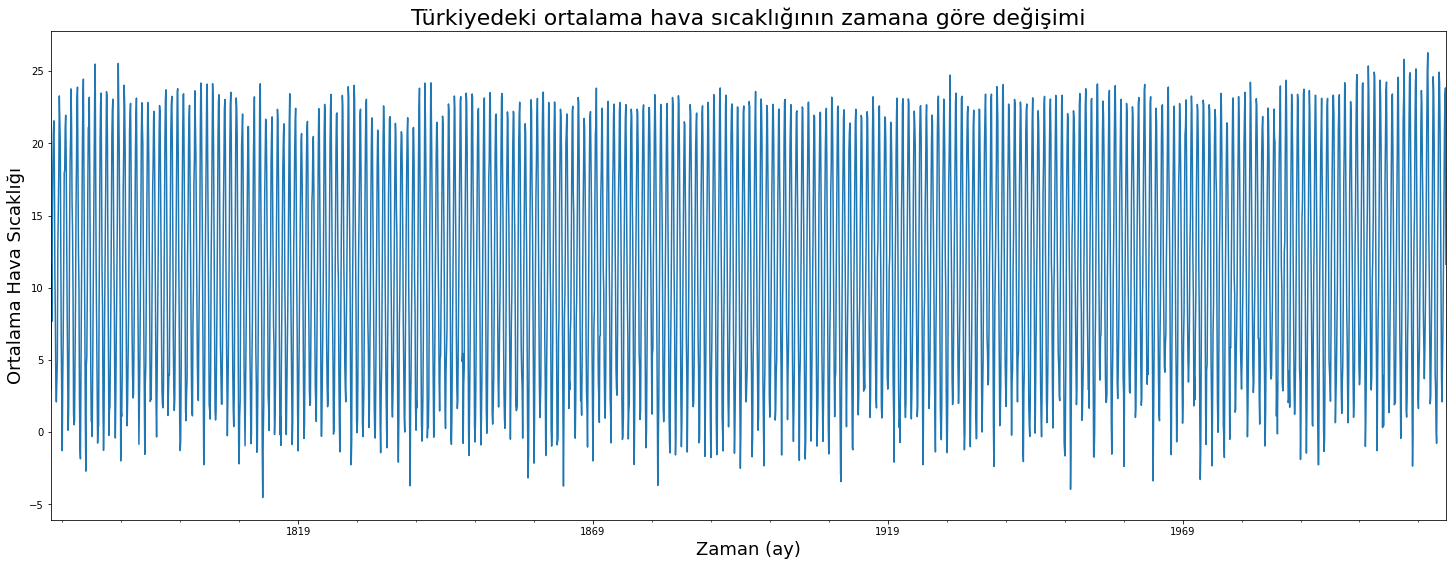

In [9]:
df["AverageTemperature"].plot(figsize=(25,9))
plt.xlabel("Zaman (ay)",fontsize=18);
plt.ylabel("Ortalama Hava Sıcaklığı",fontsize=18);
plt.title("Türkiyedeki ortalama hava sıcaklığının zamana göre değişimi",fontsize=22);


In [ ]:
df.shape

(2840, 2)

#### In time series analysis, a time series is considered stationary if its statistical properties do not depend on the time at which the series is observed. In other words, a stationary time series is one whose statistical properties, such as the mean, variance, and autocorrelation, are constant over time.

#### Seasonality refers to the presence of periodic fluctuations in the data that occur at a regular interval, such as monthly or annually. Seasonal patterns can occur in a time series that is otherwise stationary, but they can also occur in non-stationary time series

#### It is important to identify whether a time series is stationary or non-stationary, as this can affect the choice of statistical models and techniques that can be used for analysis. Non-stationary time series may require differencing or other transformations to make them stationary before they can be analyzed.

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

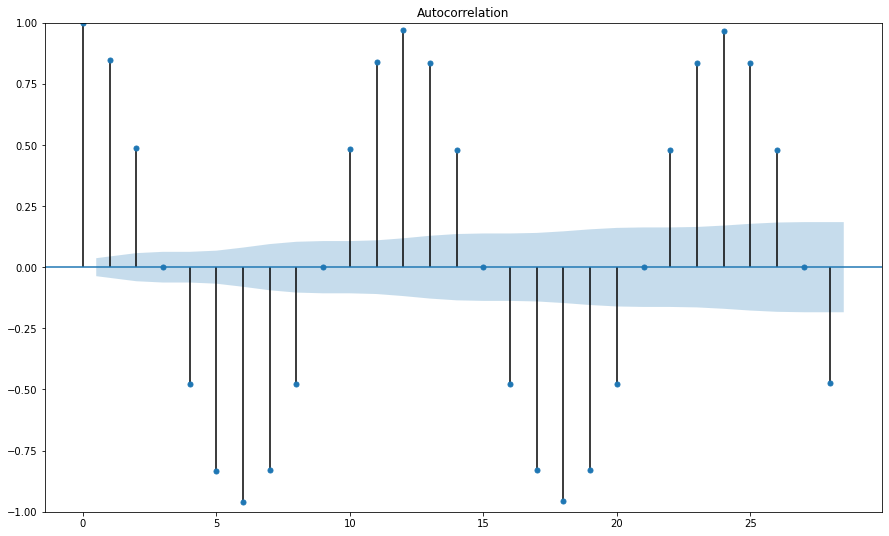

In [11]:
plt.rc("figure", figsize=(15,9))
plot_acf(df["AverageTemperature"],lags=28)
plt.show()

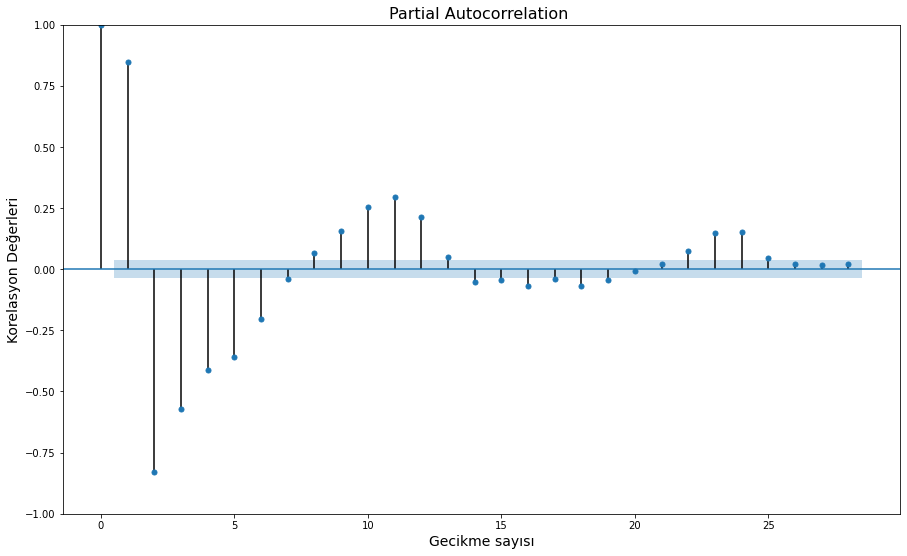

In [12]:
plt.rc("figure", figsize=(15,9))
plot_pacf(df["AverageTemperature"],lags=28)
plt.title("Partial Autocorrelation ",fontsize=16)
plt.xlabel("Gecikme sayısı",fontsize=14)
plt.ylabel("Korelasyon Değerleri",fontsize=14)
plt.show()

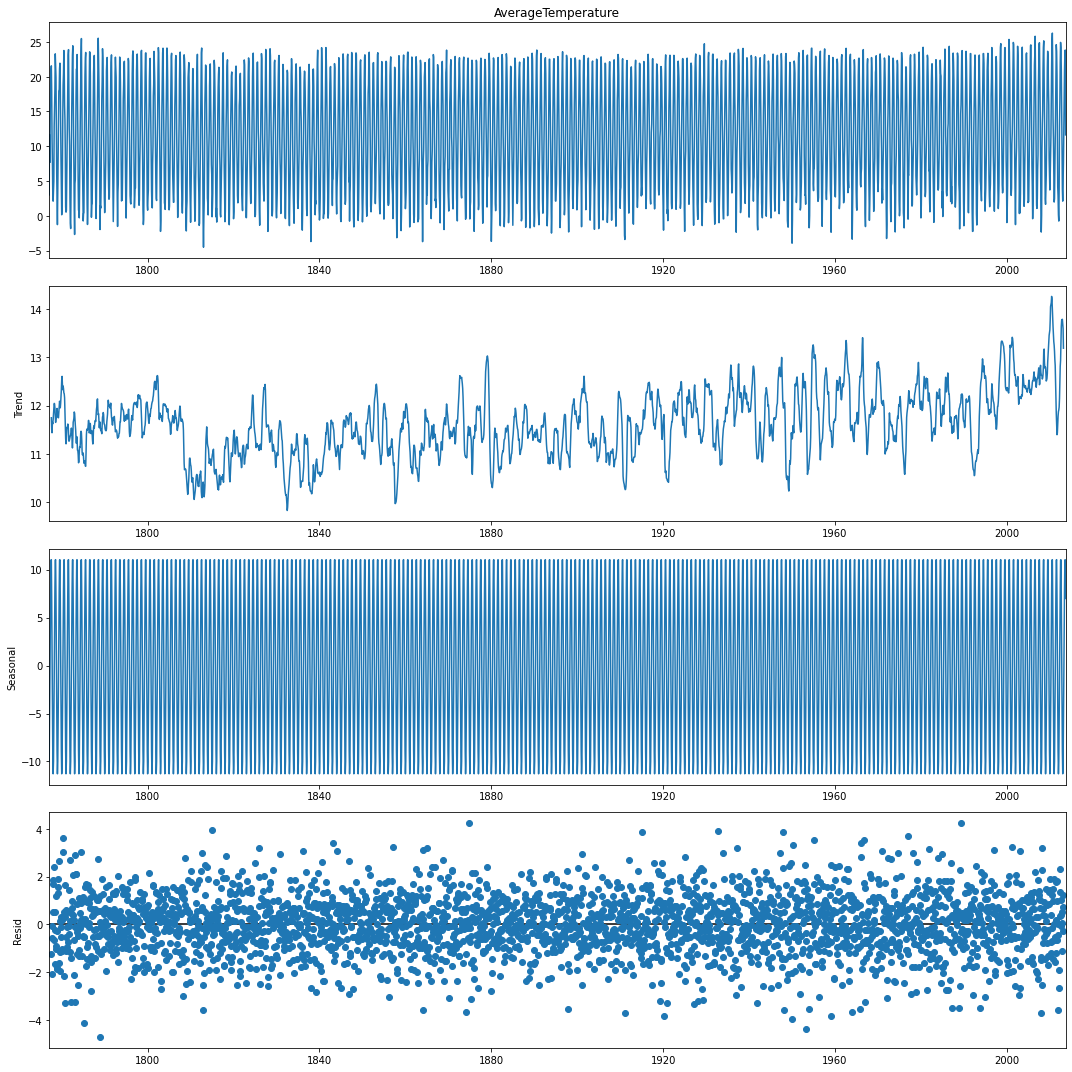

In [14]:

import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(df["AverageTemperature"],model="additive")
decomposition.plot()
plt.rcParams["figure.figsize"]=[15.0,15.0]
plt.savefig("graparima5.png")

In [15]:
from statsmodels.tsa.stattools import adfuller

def test(dataset):
    dftest=adfuller(dataset,autolag="AIC")
    print("adf:",dftest[0])
    print("p-value:",dftest[1])
    print("Num of lags:",dftest[2])
    print("Num of Observation Used For ADF Regrasyon and Critical Values Calculation :",dftest[3])
    print("Critical values:")
    for key,val in dftest[4].items():
        print("\t",key,":",val)

In [16]:
test(df["AverageTemperature"])

adf: -5.972975702749977
p-value: 1.9166905401500956e-07
Num of lags: 28
Num of Observation Used For ADF Regrasyon and Critical Values Calculation : 2811
Critical values:
	 1% : -3.4326784530747054
	 5% : -2.862568748236497
	 10% : -2.567317634040736


In [19]:
def stationarity_check(df):
    import pandas as pd
    # Determing rolling statistics
    mov_ave = df.rolling(12).mean()
    # Plot rolling statistics:
    plt.plot(df, color='green',label='Ortalama sıcaklık')
    plt.plot(mov_ave, color='blue', label='Hareketli ortalamalar',linewidth=5)
    plt.xlabel("Zaman",fontsize=14)
    plt.ylabel("Ortalama Sıcaklık ($^\circ$C)",fontsize=14)
    plt.legend(loc='best',fontsize=14)
    plt.Figure(figsize=(15,9))
    plt.title('Ortalama sıcaklık değerleri ile hareketli ortalamalar arasındaki ilişki',fontsize=14)
    plt.savefig("graparima3.png")
    plt.show(block=False)

    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller testi:')
    df_test = adfuller(df)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Kritik Değerler (%s)'%key] = value
    print(df_output)

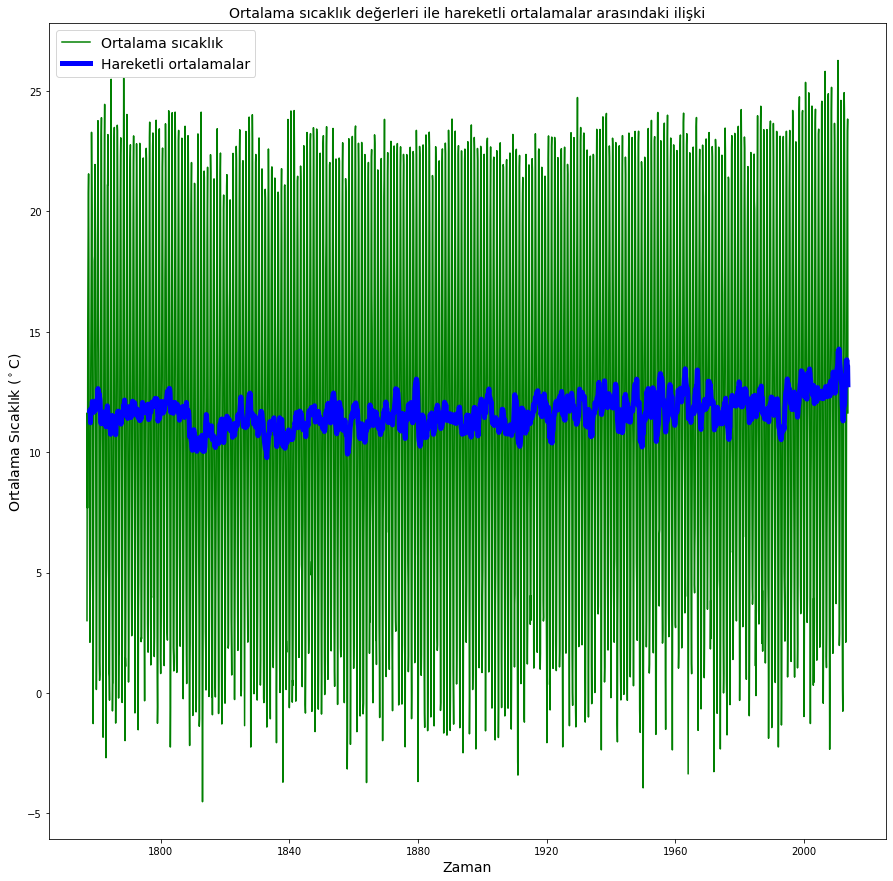

Augmented Dickey-Fuller testi:
type of df_test:  <class 'tuple'>
df_test:  (-5.972975702749977, 1.9166905401500956e-07, 28, 2811, {'1%': -3.4326784530747054, '5%': -2.862568748236497, '10%': -2.567317634040736}, 9788.570561408007)
df_output: 
 Test Statistic                -5.972976e+00
p-value                        1.916691e-07
#Lags Used                     2.800000e+01
Number of Observations Used    2.811000e+03
dtype: float64
Test Statistic                -5.972976e+00
p-value                        1.916691e-07
#Lags Used                     2.800000e+01
Number of Observations Used    2.811000e+03
Kritik Değerler (1%)          -3.432678e+00
Kritik Değerler (5%)          -2.862569e+00
Kritik Değerler (10%)         -2.567318e+00
dtype: float64


In [20]:
stationarity_check(df.AverageTemperature)

In [21]:
from pmdarima import auto_arima
stepwise_fit=auto_arima(df["AverageTemperature"],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10993.344, Time=5.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16426.131, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14565.459, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15200.978, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16424.132, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14562.430, Time=2.97 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10781.707, Time=5.79 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.44 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10259.434, Time=7.98 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=8.02 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=10698.719, Time=9.84 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=10159.077, Time=8.67 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2840
Model:               SARIMAX(4, 1, 5)   Log Likelihood               -5024.110
Date:                Tue, 03 Jan 2023   AIC                          10068.221
Time:                        10:21:09   BIC                          10127.733
Sample:                    02-01-1777   HQIC                         10089.687
                         - 09-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0211      0.029     -0.740      0.459      -0.077       0.035
ar.L2          1.1454      0.026     44.564      0.000       1.095       1.196
ar.L3         -0.2103      0.027     -7.847      0.000      -0.263      -0.158
ar.L4         -0.8902      0.029    -30.681      0.000      -0.947      -0.833
ma.L1         -0.8587      0.022    -38.501      0.000      -0.902      -0.815
ma.L2         -1.2653      0.038    -33.430      0.000      -1.339      -1.191
ma.L3          1.2601      0.025     50.882      0.000       1.212       1.309
ma.L4          0.7608      0.037     20.392      0.000       0.688       0.834
ma.L5         -0.8769      0.021    -42.658      0.000      -0.917      -0.837
sigma2         1.9752      0.046     43.143      0.000       1.885       2.065
===================================================================================
Ljung-Box (L1) (Q):                 135.38   Jarque-Bera (JB):                97.29
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
s=len(df)*0.8
s

2272.0

In [23]:
df.reset_index(inplace=True)
df


,dt,AverageTemperature,time
0,1777-02-01,3.000000,0
1,1777-03-01,11.631567,1
2,1777-04-01,7.678000,2
3,1777-05-01,15.293000,3
4,1777-06-01,18.661000,4
...,...,...,...
2835,2013-05-01,17.522000,2835
2836,2013-06-01,20.862000,2836
2837,2013-07-01,23.335000,2837
2838,2013-08-01,23.839000,2838


In [24]:
train=df.loc[:s, 'AverageTemperature']
test=df.loc[s:, 'AverageTemperature']


In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
model=ARIMA(train,order=(4,1,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     AverageTemperature   No. Observations:                 2273
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -3973.515
Date:                Tue, 03 Jan 2023   AIC                           7967.030
Time:                        10:24:49   BIC                           8024.315
Sample:                             0   HQIC                          7987.928
                               - 2273                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0148      0.036     -0.412      0.681      -0.085       0.055
ar.L2          1.1468      0.033     34.954      0.000       1.082       1.211
ar.L3         -0.2246      0.032     -6.929      0.000      -0.288      -0.161
ar.L4         -0.8783      0.036    -24.642      0.000      -0.948      -0.808
ma.L1         -0.8488      0.030    -28.664      0.000      -0.907      -0.791
ma.L2         -1.2672      0.049    -25.678      0.000      -1.364      -1.170
ma.L3          1.2509      0.031     40.571      0.000       1.190       1.311
ma.L4          0.7395      0.047     15.648      0.000       0.647       0.832
ma.L5         -0.8558      0.026    -33.306      0.000      -0.906      -0.805
sigma2         1.8882      0.051     37.244      0.000       1.789       1.988
===================================================================================
Ljung-Box (L1) (Q):                 102.51   Jarque-Bera (JB):                30.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.12
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
start=len(train)-1
end=len(train)+len(test)-2
pred=model.predict(start=start,end=end,typ="levels")

In [28]:
pred

2272    19.915194
2273    22.257951
2274    21.625294
2275    18.490583
2276    13.799425
          ...    
2835    15.113825
2836    19.213864
2837    21.410108
2838    21.114807
2839    18.407693
Name: predicted_mean, Length: 568, dtype: float64

In [29]:
test

2272    19.593000
2273    23.515000
2274    23.903000
2275    18.564000
2276    15.539000
          ...    
2835    17.522000
2836    20.862000
2837    23.335000
2838    23.839000
2839    11.631567
Name: AverageTemperature, Length: 568, dtype: float64

In [30]:
type(pred)

pandas.core.series.Series

In [31]:
test_df=pd.DataFrame(test)

In [32]:
test_df["prediction_arima"]=pred

In [33]:
test_df

,AverageTemperature,prediction_arima
2272,19.593000,19.915194
2273,23.515000,22.257951
2274,23.903000,21.625294
2275,18.564000,18.490583
2276,15.539000,13.799425
...,...,...
2835,17.522000,15.113825
2836,20.862000,19.213864
2837,23.335000,21.410108
2838,23.839000,21.114807


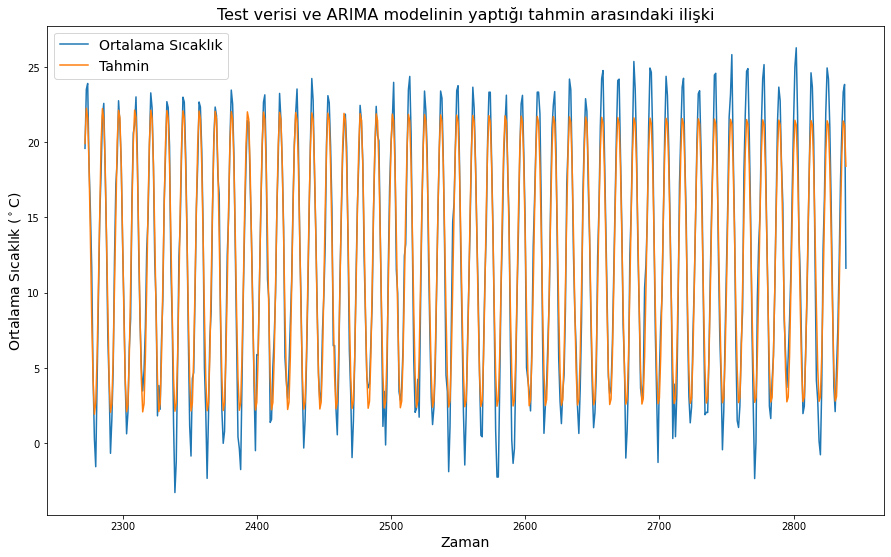

In [35]:
test_df.plot(figsize=(15,9))
plt.xlabel("Zaman",fontsize=14)
plt.ylabel("Ortalama Sıcaklık ($^\circ$C)",fontsize=14)
plt.legend(["Ortalama Sıcaklık","Tahmin"],loc='best',fontsize=14)
#plt.Figure(figsize=(15,9))
plt.title('Test verisi ve ARIMA modelinin yaptığı tahmin arasındaki ilişki',fontsize=16)
plt.savefig("graparima4.png")
plt.show()

In [36]:
# HATALARI HESAPLA
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
from math import sqrt
def give_error(df):
    RMSE=sqrt(mean_squared_error(df["prediction_arima"],df["AverageTemperature"]))
    MSE=mean_squared_error(df["prediction_arima"],df["AverageTemperature"])
    MAE=mean_absolute_error(df["prediction_arima"],df["AverageTemperature"])
    MAPE=mean_absolute_percentage_error(df["prediction_arima"],df["AverageTemperature"])
    r2_scored=r2_score(df["prediction_arima"],df["AverageTemperature"])
    print("R_2 DEĞERİ:",r2_scored)
    print("RMSE(Ortalama Karekök Hata): ",RMSE)
    print("MSE(Ortalama Hata Kareleri)",MSE)
    print("MAE(Ortalama Absolute Error):",MAE)
    print("MAPE(Ortalama Mutlak Hata):",MAPE)

In [37]:
give_error(test_df)

R_2 DEĞERİ: 0.9325698968570291
RMSE(Ortalama Karekök Hata):  1.8104976417509697
MSE(Ortalama Hata Kareleri) 3.2779017107858226
MAE(Ortalama Absolute Error): 1.4191609989089873
MAPE(Ortalama Mutlak Hata): 0.22971189535456465
